# MNIST using keras

## Import packages

np_utils는 유틸리티 라이브러리이고 mnist는 우리가 사용하고자 하는 데이터 세트입니다.

직접 데이터를 받고자 하는 경우 다음 사이트를 참고하세요.
http://yann.lecun.com/exdb/mnist/

In [143]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

## Load data sets

아래 구문을 이용해서 mnist 데이터 세트를 로드합시다.

    mnist.load_data()
    
학습데이터와 테스트데이터, 2개의 tuple로 데이터가 리턴됩니다. 2개의 tuple은 다시 데이터와 레이블로 구성되어 있습니다.

In [144]:
# train, test = mnist.load_data()
# x_train, y_train = train
# x_test, y_test = test

### Quiz

위의 3줄을 한 줄로 표현해 보세요.

In [145]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 입력 데이터 살펴 보기

x_train과 x_test의 데이터 형태를 확인해 봅시다. 어떻게 하죠?

In [146]:
x_train.shape

(60000, 28, 28)

In [147]:
x_test.shape

(10000, 28, 28)

### Quiz

어떤 데이터가 더 많나요?

### 입력 데이터 변형하기 

x_train과 x_test 데이터를 학습하기 좋은 형태로 변형합시다.

- 각 채널의 데이터를 하나의 리스트로 변경합시다.
- 각 픽셀의 값을 normalize합시다.

In [148]:
x_train_norm = x_train.reshape(60000, 784).astype('float32') / 255.0

In [149]:
x_test_norm = x_test.reshape(10000, 784).astype('float32') / 255.0

제대로 변형되었는지 확인합시다.

In [150]:
x_train_norm.shape

(60000, 784)

In [151]:
x_test_norm.shape

(10000, 784)

### 레이블 데이터 살펴보기

y_train과 y_test에 어떤 값들이 들어 있는지 확인해 봅시다.

In [152]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [153]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 레이블 데이터 변형하기

아래 구문을 이용해서 y_train과 y_test, 2개의 레이블 데이터를 one-hot 형태로 변형합시다.

        np_utils.to_categorical(데이터)
       

In [154]:
y_train_mod = np_utils.to_categorical(y_train)
y_test_mod = np_utils.to_categorical(y_test)

제대로 변형되었는지 확인합시다.

In [155]:
y_train_mod[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [156]:
y_test_mod[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

## Create a model

**model**이라는 Sequential 모델을 생성합시다.

In [157]:
model = Sequential()

### 첫번째 레이어 생성하기

모델을 생성하고 64개의 노드를 가진 레이어를 생성합시다. 이때 activation은 relu를 사용합시다.

In [158]:
model.add(Dense(units=64, input_dim=784, activation='relu'))

### 두번째 레이어 추가하기

우리가 원하는 결과값 (10개의 숫자 중 어떤 숫자인지를 판별)을 얻기 위해 마지막에는 10개의 노드를 가진 레이어를 생성합시다. 이때 activation은 softmax를 사용합시다.

In [159]:
model.add(Dense(units=10, activation='softmax'))

# 모델 시각화하기

In [160]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

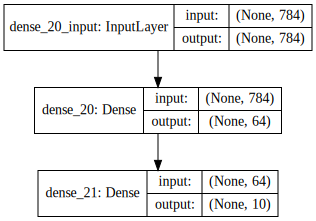

In [161]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

제대로 구성되었나요?

# 모델의 학습 과정 설정하기

아래 구문을 이용해서 모델이 어떻게 학습을 할지를 설정합니다.

    model.compile(loss=사용하고자하는loss유형, metrics=사용하고자하는지표리스트, optimizer=사용하고자하는옵티마이저이름)
    
loss에는 multi-class classification에 적합한 'categorical_crossentropy'를, optimizer에는 sgd를 metrics에는 정확도를 사용합시다.

In [162]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습하기

이제 모델을 학습시킵시다.

    model.fit(학습데이터, 학습레이블, batch_size=배치개수, epochs=학습회수)
    
데이터가 크기 때문에 배치개수는 32개로 하고 학습은 5회 정도로 해 봅시다. fit 메소드는 학습 과정의 히스토리를 반환합니다. 이 값을 **hist**라는 변수에 저장해 봅시다.

In [163]:
hist = model.fit(x_train_norm, y_train_mod, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s - loss: 0.6698 - acc: 0.8305    
Epoch 2/5
60000/60000 [==============================] - 10s - loss: 0.3454 - acc: 0.9033    
Epoch 3/5
60000/60000 [==============================] - 11s - loss: 0.2979 - acc: 0.9162    
Epoch 4/5
60000/60000 [==============================] - 10s - loss: 0.2691 - acc: 0.9240    
Epoch 5/5
60000/60000 [==============================] - 9s - loss: 0.2470 - acc: 0.9305     


# 학습 과정 살펴보기

## history 살펴보기

모델의 학습 과정을 저장한 변수인 **hist**를 출력해 봅시다. 아래와 같이 history라는 속성을 지정해야만 원하는 값을 얻을 수 있습니다.

    hist.history

In [164]:
hist.history

{'acc': [0.83050000000000002,
  0.90328333333333333,
  0.91620000000000001,
  0.92398333333333338,
  0.93048333333333333],
 'loss': [0.66982555380662279,
  0.34544313565691315,
  0.2978670123696327,
  0.26907469138701756,
  0.24700683068037033]}

# 모델 평가하기

학습 결과를 확인하기 위해 아래 구문을 사용합시다.

    model.evaluate(테스트데이터, 테스트레이블)    

In [165]:
model.evaluate(x_test_norm, y_test_mod)

 9728/10000 [============================>.] - ETA: 0s

[0.23204573025405406, 0.93469999999999998]

## 학습한 모델로 테스트 데이터 예측해 보기

테스트 데이터 중 첫번째 데이터의 결과값을 예측해 봅시다.

    model.predict(data)

In [166]:
model.predict(x_test_norm)[0]

array([  2.38163382e-04,   1.09227251e-07,   6.84610393e-04,
         2.86139571e-03,   1.85625515e-06,   2.61543610e-04,
         1.37245436e-07,   9.95303273e-01,   3.18392667e-05,
         6.17182348e-04], dtype=float32)

값을 확인하기 어려우니 가장 큰 값의 인덱스를 확인해 봅시다. argmax()를 이용하면 가장 큰 값의 인덱스를 얻을 수 있습니다.

    numpy.array.argmax()

In [167]:
model.predict(x_test_norm)[0].argmax()

7

제대로 된 결과값인가요? 확인을 위해 해당 이미지를 출력해 봅시다.

### 이미지 데이터 표시하기

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

## Quiz

현재 변형된 이미지 데이터를 원래의 형태로 되돌리는 함수를 만들어 봅시다.

- 입력으로는 이미지 array를 받는다.
- 원래의 다차원 형태로 변형한다.
- normalize를 되돌린다.

In [169]:
def orgin_data(arr):
    return arr.reshape(28,28)*255

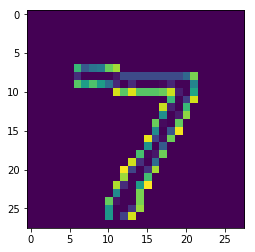

In [170]:
plt.imshow(orgin_data(x_test[0]))

7이 맞나요?

## Save and Load the model

In [171]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

## Reference

https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py